In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df_ori = pd.read_csv("C:/Users/Owner/Documents/RealEstate Project/data/suumo_central_tokyo_analysis.csv")
df_ori.head()

,apt_name,total Price,prefecture,city,town,line,station,way,walking time,area [m2],...,D,K,S,balcony [m2],date_month,age,population,price/m2,count,popularity
0,ライオンズガーデン四谷津の守坂,158000000,東京,新宿,四谷三栄町,東京メトロ丸ノ内線,四谷三丁目,徒歩,6,62.48,...,1,1,0,6.62,2,21,352717.0,2.528809e+06,1294,0.366866
1,トルナーレ日本橋浜町,248000000,東京,中央,日本橋浜町３,東京メトロ半蔵門線,水天宮前,徒歩,5,78.62,...,1,1,0,25.53,8,20,187404.0,3.154414e+06,1127,0.601375
2,富久クロス コンフォートタワー,368000000,東京,新宿,富久町,東京メトロ丸ノ内線,新宿御苑前,徒歩,7,75.38,...,1,1,0,12.21,4,10,352717.0,4.881932e+06,1294,0.366866
3,パークコート千代田富士見ザ タワー,368000000,東京,千代田,富士見２,ＪＲ中央線,飯田橋,徒歩,3,64.47,...,1,1,0,10.89,3,11,68835.0,5.708081e+06,323,0.469238
4,八丁堀東豊エステート,11800000,東京,中央,新川２-11-1,東京メトロ日比谷線,八丁堀,徒歩,2,12.78,...,0,0,0,1.42,12,51,187404.0,9.233177e+05,1127,0.601375


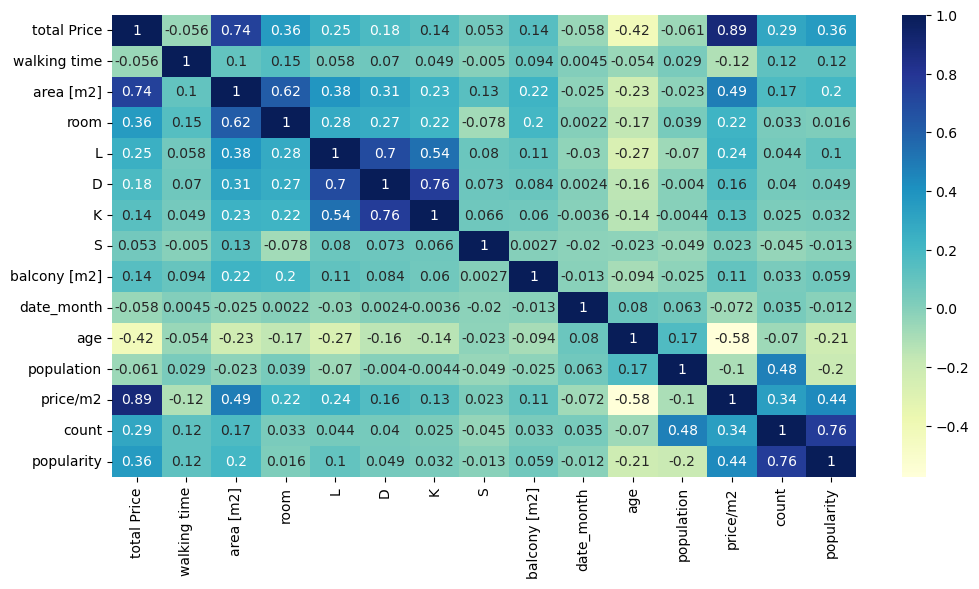

In [3]:
plt.figure(figsize=(12, 6))
# Compute correlation matrix
co_mtx = df_ori.corr(numeric_only=True)

# Plot correlation heatmap
sns.heatmap(co_mtx, cmap="YlGnBu", annot=True)

# Display heatmap
plt.show()

In [4]:
# Because there are only one unique values
# High correlation between price/m2 and totap Price (0.89)
df = df_ori.drop(["apt_name", "prefecture", "way", "price/m2"], axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6550 entries, 0 to 6549
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   total Price   6550 non-null   int64  
 1   city          6550 non-null   object 
 2   town          6550 non-null   object 
 3   line          6550 non-null   object 
 4   station       6550 non-null   object 
 5   walking time  6550 non-null   int64  
 6   area [m2]     6550 non-null   float64
 7   room          6550 non-null   int64  
 8   L             6550 non-null   int64  
 9   D             6550 non-null   int64  
 10  K             6550 non-null   int64  
 11  S             6550 non-null   int64  
 12  balcony [m2]  6550 non-null   float64
 13  date_month    6550 non-null   int64  
 14  age           6550 non-null   int64  
 15  population    6550 non-null   float64
 16  count         6550 non-null   int64  
 17  popularity    6550 non-null   float64
dtypes: float64(4), int64(10), ob

#### MLR & GAMs:  encoding for categorical variables

- Top-N + One-hot
- frequency encoding is not suitable for MLR & GAMs because the magnitude of the encoded values are interapted as meaningful, which causes misleading


#### Other model(clustering, classification, ansamble)
- Frequency encoding

- Target Encoding is useful when there is an correlation between categorical values and response variables (regression and classification). But it causes leakages so we have to use cross-validation. Also, make sure to apply them after splitting the data for CV or train-test-split

- one-hot encoding: Only when the nubmber of values are around 10

In [6]:
num_columns = df.select_dtypes(include=["int", "float"])
cat_columns = df.select_dtypes(include=["object"])

num_columns.columns

Index(['total Price', 'walking time', 'area [m2]', 'room', 'L', 'D', 'K', 'S',
       'balcony [m2]', 'date_month', 'age', 'population', 'count',
       'popularity'],
      dtype='object')

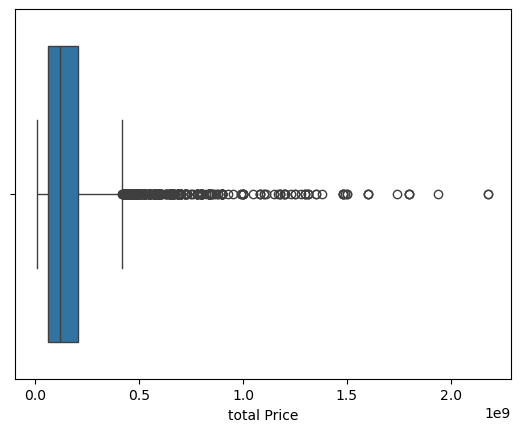

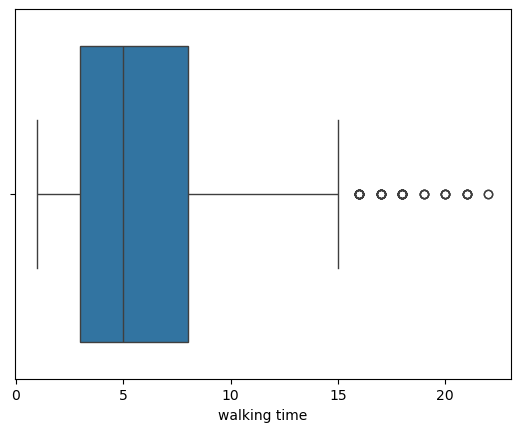

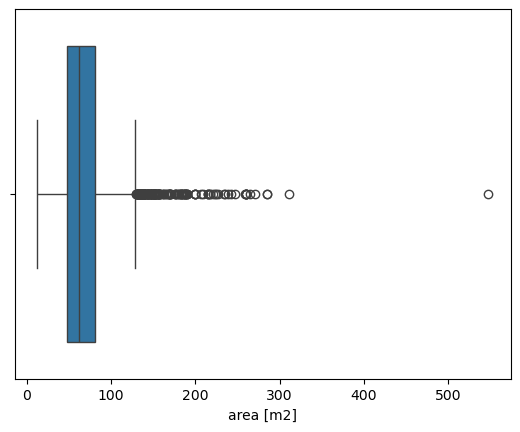

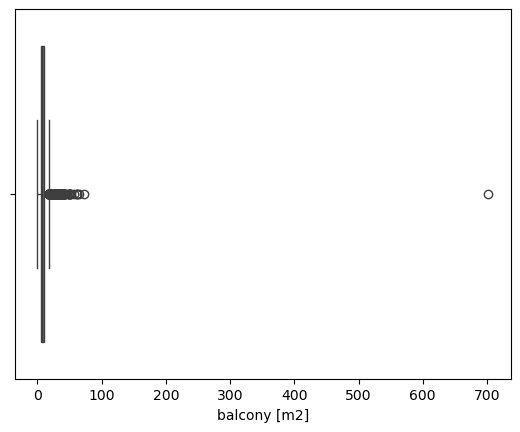

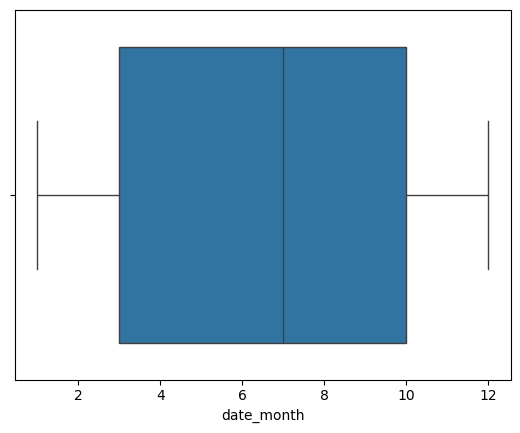

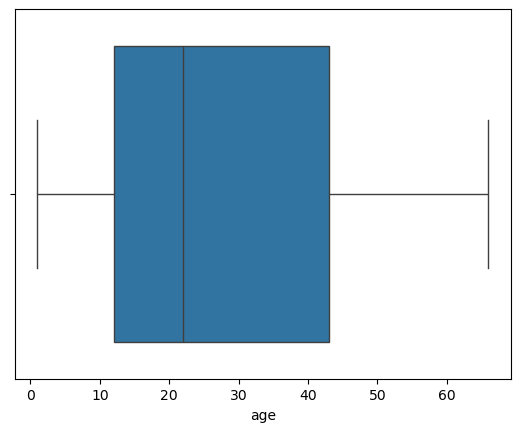

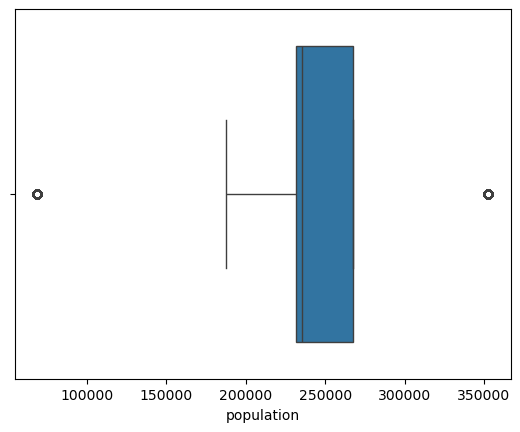

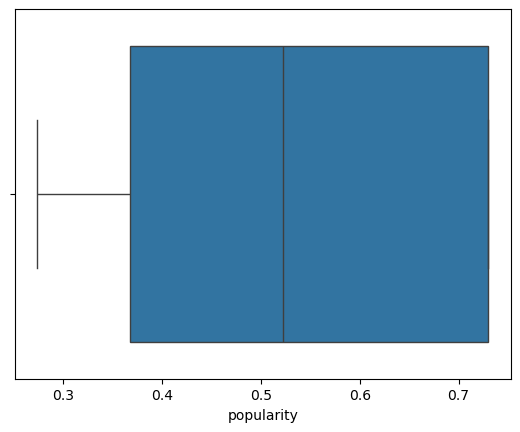

In [7]:
outlier_cols = ["total Price", "walking time", "area [m2]", "balcony [m2]", "date_month", "age", "population", "popularity"]
for col in outlier_cols:
  sns.boxplot(x=col, data=df)
  plt.show()


In [8]:
# Function for Removing Outliers (loose)
def remove_outliers(df, cols):
  df_removed = df.copy()
  for col in cols:
    q1 = df[col].quantile(.1)
    q3 = df[col].quantile(.9)
    iqr = q3 - q1

    lower_band = q1 - 1.0*iqr
    upper_band = q3 + 1.0*iqr
    df_removed = df_removed[(df_removed[col] >= lower_band) & (df_removed[col] <= upper_band)]

  return df_removed


df = remove_outliers(df, outlier_cols)


# 1. Regression


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6294 entries, 0 to 6547
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   total Price   6294 non-null   int64  
 1   city          6294 non-null   object 
 2   town          6294 non-null   object 
 3   line          6294 non-null   object 
 4   station       6294 non-null   object 
 5   walking time  6294 non-null   int64  
 6   area [m2]     6294 non-null   float64
 7   room          6294 non-null   int64  
 8   L             6294 non-null   int64  
 9   D             6294 non-null   int64  
 10  K             6294 non-null   int64  
 11  S             6294 non-null   int64  
 12  balcony [m2]  6294 non-null   float64
 13  date_month    6294 non-null   int64  
 14  age           6294 non-null   int64  
 15  population    6294 non-null   float64
 16  count         6294 non-null   int64  
 17  popularity    6294 non-null   float64
dtypes: float64(4), int64(10), object(

In [10]:
df_reg = df.copy()

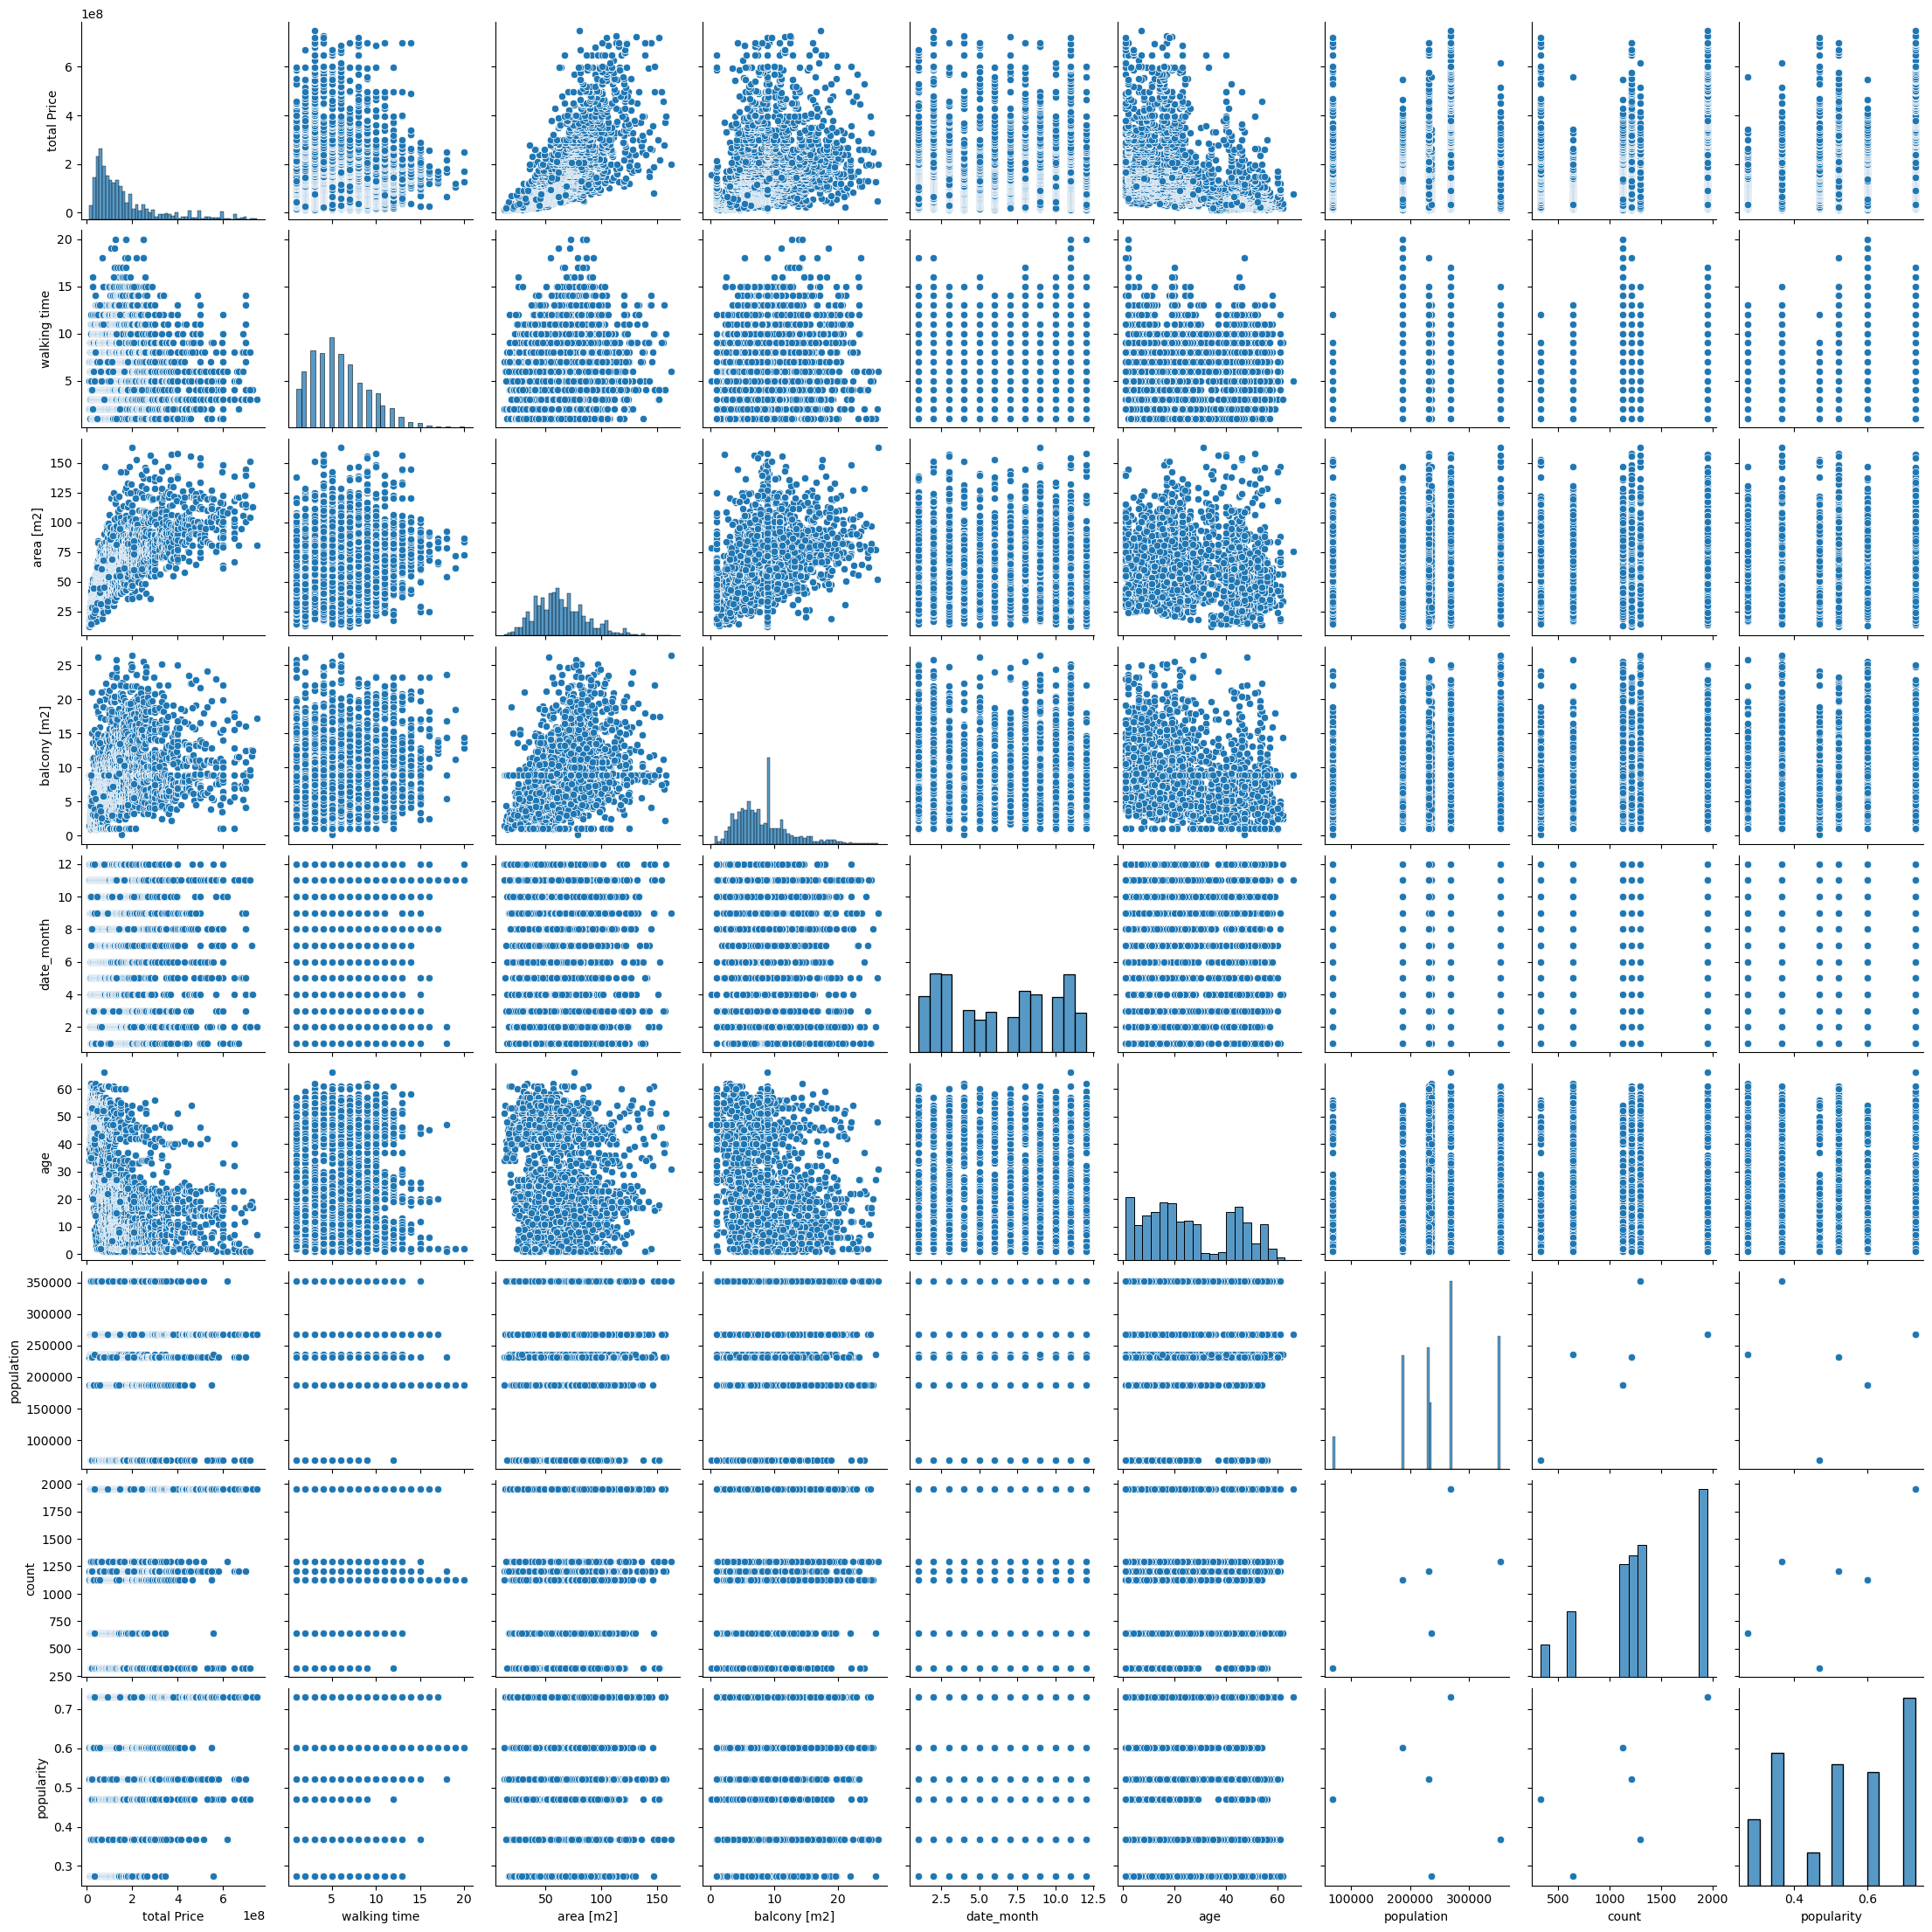

In [11]:
pairplot_cols = ["total Price", "walking time", "area [m2]", "balcony [m2]", "date_month", "age", "population", "count",	"popularity"]
sns.pairplot(df[pairplot_cols])
plt.show()

In [12]:
# Check the unique values
for col in cat_columns:
  print(f'\n {col}: {df_reg[col].nunique()}, {df_reg[col].unique()}')

# Drop town because the # of unique values in town is too many
df_reg = df_reg.drop("town", axis=1)


 city: 6, ['新宿' '中央' '千代田' '港' '文京' '渋谷']

 town: 1210, ['四谷三栄町' '日本橋浜町３' '富久町' ... '白金１-2-1' '三番町26-1' '元麻布１-3-1']

 line: 34, ['東京メトロ丸ノ内線' '東京メトロ半蔵門線' 'ＪＲ中央線' '東京メトロ日比谷線' '東京メトロ南北線' '西武新宿線'
 '東京メトロ千代田線' 'ＪＲ山手線' '都営大江戸線' '東京メトロ有楽町線' 'ＪＲ総武線' '都営三田線' '東京メトロ東西線'
 '都営浅草線' '都営新宿線' '京王線' '小田急線' '東京メトロ副都心線' '東急東横線' 'ＪＲ総武線快速' '東京メトロ銀座線'
 '京王新線' '東京モノレール' '京王井の頭線' '新交通ゆりかもめ' 'ＪＲ京葉線' 'りんかい線' 'ＪＲ京浜東北線' '西武池袋線'
 '京急本線' '東急田園都市線' '都電荒川線' 'ＪＲ埼京線' 'ＪＲ東海道本線']

 station: 145, ['四谷三丁目' '水天宮前' '新宿御苑前' '飯田橋' '八丁堀' '白金高輪' '中井' '根津' '高田馬場' '落合南長崎' '若松河田'
 '江戸川橋' '市ケ谷' '新大久保' '大久保' '千石' '下落合' '広尾' '勝どき' '東中野' '三田' '麻布十番' '牛込神楽坂'
 '本駒込' '護国寺' '後楽園' '早稲田' '人形町' '浜町' '田町' '笹塚' '千駄木' '半蔵門' '新宿' '東銀座' '田端'
 '南新宿' '北参道' '恵比寿' '新宿三丁目' '茅場町' '曙橋' '駒込' '代々木公園' '代々木八幡' '春日' '新大塚'
 '白金台' '代々木' '神楽坂' '神谷町' '浜松町' '渋谷' '代々木上原' '新富町' '高輪台' '白山' '代官山' '四ツ谷'
 '西新宿五丁目' '馬喰町' '西早稲田' '表参道' '本郷三丁目' '三越前' '原宿' '初台' '御成門' '九段下' '銀座' '湯島'
 '赤坂' '神田' '水道橋' '幡ヶ谷' '東新宿' '築地' '品川' '六本木' '乃木坂' '茗荷谷' '雑司が谷' '天王洲アイル'
 '月島' '西新宿' '麹町' '神

In [13]:
# map (only series and columns)
# df['col'].map(lambda x: x * 2)      # OK
# df['col'].map({'A': 1, 'B': 2})     # OK
# df[['col1', 'col2']].map(...)       # ERROR


# apply (both series & dataframe, both row & columns are OK)
# df['col'].apply(lambda x: x * 2)          # Series (similar to map)
# df.apply(lambda row: row.sum(), axis=1)   # preprocess per row
# df.apply(lambda col: col.mean())          # preprocess per column

In [14]:
# Encoding
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

# city: One-hot

# line: Top 10(other for the rest) + One-hot
top_10_lines = df_reg["line"].value_counts().nlargest(10).to_frame().index
df_reg["line"] = df["line"].apply(lambda x: x if x in top_10_lines else "other")

# station: Top 20(other for the rest) + One-hot
top_20_stations = df_reg["station"].value_counts().nlargest(20).index
df_reg["station"] = df_reg["station"].apply(lambda x: x if x in top_20_stations else "other")

df_reg = pd.get_dummies(df_reg, columns=["city", "line", "station"], dtype=int)
df_reg.head()

,total Price,walking time,area [m2],room,L,D,K,S,balcony [m2],date_month,...,station_月島,station_水天宮前,station_江戸川橋,station_渋谷,station_田町,station_白金高輪,station_笹塚,station_西新宿五丁目,station_赤坂,station_麻布十番
0,158000000,6,62.48,2,1,1,1,0,6.62,2,...,0,0,0,0,0,0,0,0,0,0
1,248000000,5,78.62,3,1,1,1,0,25.53,8,...,0,1,0,0,0,0,0,0,0,0
2,368000000,7,75.38,3,1,1,1,0,12.21,4,...,0,0,0,0,0,0,0,0,0,0
3,368000000,3,64.47,2,1,1,1,0,10.89,3,...,0,0,0,0,0,0,0,0,0,0
4,11800000,2,12.78,1,0,0,0,0,1.42,12,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6294 entries, 0 to 6547
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total Price     6294 non-null   int64  
 1   walking time    6294 non-null   int64  
 2   area [m2]       6294 non-null   float64
 3   room            6294 non-null   int64  
 4   L               6294 non-null   int64  
 5   D               6294 non-null   int64  
 6   K               6294 non-null   int64  
 7   S               6294 non-null   int64  
 8   balcony [m2]    6294 non-null   float64
 9   date_month      6294 non-null   int64  
 10  age             6294 non-null   int64  
 11  population      6294 non-null   float64
 12  count           6294 non-null   int64  
 13  popularity      6294 non-null   float64
 14  city_中央         6294 non-null   int32  
 15  city_千代田        6294 non-null   int32  
 16  city_文京         6294 non-null   int32  
 17  city_新宿         6294 non-null   int32 

In [16]:
# Split to the predictors and response variable
X_reg = df_reg.drop("total Price", axis=1)
y_reg = df_reg["total Price"].values.reshape(-1, 1)

# Apply Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_reg_scaled = scaler.fit_transform(X_reg)

# Apply Log transformation
from sklearn.preprocessing import PowerTransformer
log = PowerTransformer()
y_reg_log = log.fit_transform(y_reg)

In [17]:
X_reg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6294 entries, 0 to 6547
Data columns (total 51 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   walking time    6294 non-null   int64  
 1   area [m2]       6294 non-null   float64
 2   room            6294 non-null   int64  
 3   L               6294 non-null   int64  
 4   D               6294 non-null   int64  
 5   K               6294 non-null   int64  
 6   S               6294 non-null   int64  
 7   balcony [m2]    6294 non-null   float64
 8   date_month      6294 non-null   int64  
 9   age             6294 non-null   int64  
 10  population      6294 non-null   float64
 11  count           6294 non-null   int64  
 12  popularity      6294 non-null   float64
 13  city_中央         6294 non-null   int32  
 14  city_千代田        6294 non-null   int32  
 15  city_文京         6294 non-null   int32  
 16  city_新宿         6294 non-null   int32  
 17  city_渋谷         6294 non-null   int32 

## 1-1. Regression: MLR

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error

mlr = LinearRegression()

cv = KFold(n_splits=10, shuffle=True, random_state=1)

r_squared_results = []
rmse_results = []

for train_index, test_index in cv.split(X_reg_scaled):
  X_reg_train, X_reg_test, y_reg_train, y_reg_test = X_reg_scaled[train_index], X_reg_scaled[test_index], y_reg_log[train_index], y_reg_log[test_index]
  mlr.fit(X_reg_train, y_reg_train)
  y_reg_pred = mlr.predict(X_reg_test)

  r2 = r2_score(y_reg_test, y_reg_pred)
  r_squared_results.append(r2)
  rmse = mean_squared_error(y_reg_test, y_reg_pred)
  rmse_results.append(rmse)

print("Average R-squared: ", np.mean(r_squared_results))
print("Average RMSE: ", np.mean(rmse_results))


Average R-squared:  0.9008920981892867
Average RMSE:  0.09892717486954267


In [19]:
df_reg_results = pd.DataFrame({"Feature": X_reg.columns, "Coefficient": mlr.coef_[0], "Abs Coefficient": np.abs(mlr.coef_[0])})
df_reg_results = df_reg_results.sort_values(by="Abs Coefficient", ascending=False).reset_index(drop=True)
df_reg_results.head(10)

,Feature,Coefficient,Abs Coefficient
0,area [m2],0.567584,0.567584
1,age,-0.425198,0.425198
2,walking time,-0.087667,0.087667
3,city_港,0.072774,0.072774
4,popularity,0.071074,0.071074
5,L,0.057246,0.057246
6,count,0.051200,0.051200
7,city_新宿,-0.050960,0.050960
8,D,0.048321,0.048321
9,station_麻布十番,0.042026,0.042026


In [20]:
import statsmodels.api as sm

X_sm = sm.add_constant(X_reg_scaled)
mlr_model = sm.OLS(y_reg_log, X_sm)

results = mlr_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     1284.
Date:                Thu, 15 May 2025   Prob (F-statistic):               0.00
Time:                        11:25:50   Log-Likelihood:                -1608.0
No. Observations:                6294   AIC:                             3308.
Df Residuals:                    6248   BIC:                             3618.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.889e-15      0.004  -1.49e-12      1.000      -0.008       0.008
x1            -0.0894      0.005    -19.450      0.000      -0.098      -0.080
x2             0.5657      0.006     89.347      0.000       0.553       0.578
x3             0.0195      0.006      3.388      0.001       0.008       0.031
x4             0.0570      0.006      9.675      0.000       0.045       0.069
x5             0.0490      0.007      6.792      0.000       0.035       0.063
x6            -0.0019      0.006     -0.308      0.758      -0.014       0.010
x7             0.0071      0.004      1.699      0.089      -0.001       0.015
x8             0.0412      0.005      8.862      0.000       0.032       0.050
x9            -0.0179      0.004     -4.375      0.000      -0.026      -0.010
x10           -0.4250      0.005    -92.716      0.000      -0.434      -0.416
x11           -0.0254      0.002    -11.062      0.000      -0.030      -0.021
x12            0.0513      0.002     25.346      0.000       0.047       0.055
x13            0.0706      0.002     31.908      0.000       0.066       0.075
x14           -0.0398      0.006     -6.709      0.000      -0.051      -0.028
x15            0.0304      0.004      7.302      0.000       0.022       0.039
x16           -0.0350      0.004     -8.656      0.000      -0.043      -0.027
x17           -0.0506      0.003    -18.015      0.000      -0.056      -0.045
x18            0.0168      0.005      3.498      0.000       0.007       0.026
x19            0.0725      0.003     23.066      0.000       0.066       0.079
x20           -0.0323      0.004     -7.769      0.000      -0.040      -0.024
x21            0.0065      0.005      1.346      0.178      -0.003       0.016
x22            0.0167      0.005      3.444      0.001       0.007       0.026
x23            0.0211      0.008      2.673      0.008       0.006       0.037
x24           -0.0033      0.006     -0.563      0.573      -0.015       0.008
x25            0.0009      0.006      0.160      0.873      -0.010       0.012
x26           -0.0017      0.006     -0.286      0.775      -0.014       0.010
x27            0.0317      0.004      7.745      0.000       0.024       0.040
x28           -0.0271      0.005     -5.896      0.000      -0.036      -0.018
x29            0.0063      0.005      1.219      0.223      -0.004       0.016
x30            0.0089      0.005      1.783      0.075      -0.001       0.019
x31           -0.0216      0.004     -6.021      0.000      -0.029      -0.015
x32            0.0257      0.004      5.948      0.000       0.017       0.034
x33            0.0331      0.005      7.203      0.000       0.024       0.042
x34           -0.0239      0.007     -3.426      0.001      -0.037      -0.010
x35            0.0146      0.007      2.227      0.026       0.002       0.027
x3

In [21]:
# add deal score to dataframe
df_deal = df_ori.drop(["apt_name", "prefecture", "way", "town", "total Price", "area [m2]"], axis=1)

encoder = OneHotEncoder()

# city: One-hot

# line: Top 10(other for the rest) + One-hot
top_10_lines = df_deal["line"].value_counts().nlargest(10).to_frame().index
df_deal["line"] = df_deal["line"].apply(lambda x: x if x in top_10_lines else "other")

# station: Top 20(other for the rest) + One-hot
top_20_stations = df_deal["station"].value_counts().nlargest(20).index
df_deal["station"] = df_deal["station"].apply(lambda x: x if x in top_20_stations else "other")

df_deal = pd.get_dummies(df_deal, columns=["city", "line", "station"], dtype=int)


# Split to the predictors and response variable
X_deal = df_deal.drop("price/m2", axis=1)
y_deal = df_deal["price/m2"].values.reshape(-1, 1)

# Apply Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_deal_scaled = scaler.fit_transform(X_deal)

# Apply Log transformation
from sklearn.preprocessing import PowerTransformer
log = PowerTransformer()
y_deal_log = log.fit_transform(y_deal)

mlr.fit(X_deal_scaled, y_deal_log)
df_ori['predicted_price_m2'] = mlr.predict(X_deal_scaled)
df_ori['residual'] = df_ori['price/m2'] - df_ori['predicted_price_m2']

df_ori.drop("predicted_price_m2", axis=1, inplace=True)


In [22]:
df_deal_results = pd.DataFrame({"Feature": X_deal.columns, "Coefficient": mlr.coef_[0], "Abs Coefficient": np.abs(mlr.coef_[0])})
df_deal_results = df_deal_results.sort_values(by="Abs Coefficient", ascending=False).reset_index(drop=True)
df_deal_results.head(10)

,Feature,Coefficient,Abs Coefficient
0,age,-0.624770,0.624770
1,room,0.150759,0.150759
2,walking time,-0.127047,0.127047
3,city_港,0.123839,0.123839
4,popularity,0.118411,0.118411
5,city_新宿,-0.087199,0.087199
6,count,0.085210,0.085210
7,L,0.078259,0.078259
8,city_中央,-0.071210,0.071210
9,station_渋谷,0.067879,0.067879


# 2. Clustering

In [23]:
# Dataset for Clustering
df_clu = df_ori.drop(["apt_name", "prefecture", "way", "town", "total Price", "area [m2]"], axis=1)

In [24]:
df_clu.head()

,city,line,station,walking time,room,L,D,K,S,balcony [m2],date_month,age,population,price/m2,count,popularity,residual
0,新宿,東京メトロ丸ノ内線,四谷三丁目,6,2,1,1,1,0,6.62,2,21,352717.0,2.528809e+06,1294,0.366866,2.528809e+06
1,中央,東京メトロ半蔵門線,水天宮前,5,3,1,1,1,0,25.53,8,20,187404.0,3.154414e+06,1127,0.601375,3.154413e+06
2,新宿,東京メトロ丸ノ内線,新宿御苑前,7,3,1,1,1,0,12.21,4,10,352717.0,4.881932e+06,1294,0.366866,4.881931e+06
3,千代田,ＪＲ中央線,飯田橋,3,2,1,1,1,0,10.89,3,11,68835.0,5.708081e+06,323,0.469238,5.708081e+06
4,中央,東京メトロ日比谷線,八丁堀,2,1,0,0,0,0,1.42,12,51,187404.0,9.233177e+05,1127,0.601375,9.233192e+05


In [25]:
# Encoding
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

# city: Frequency Encoding
df_clu["city"] = df_clu["city"].map(df_clu["city"].value_counts(normalize=True))

# line:Frequency Encoding
df_clu["line"] = df_clu["line"].map(df_clu["line"].value_counts(normalize=True))

# station: Frequency Encoding
df_clu["station"] = df_clu["station"].map(df_clu["station"].value_counts(normalize=True))

df_clu.head()

,city,line,station,walking time,room,L,D,K,S,balcony [m2],date_month,age,population,price/m2,count,popularity,residual
0,0.197557,0.056031,0.006107,6,2,1,1,1,0,6.62,2,21,352717.0,2.528809e+06,1294,0.366866,2.528809e+06
1,0.172061,0.045038,0.015573,5,3,1,1,1,0,25.53,8,20,187404.0,3.154414e+06,1127,0.601375,3.154413e+06
2,0.197557,0.056031,0.015420,7,3,1,1,1,0,12.21,4,10,352717.0,4.881932e+06,1294,0.366866,4.881931e+06
3,0.049313,0.020305,0.006565,3,2,1,1,1,0,10.89,3,11,68835.0,5.708081e+06,323,0.469238,5.708081e+06
4,0.172061,0.082443,0.009160,2,1,0,0,0,0,1.42,12,51,187404.0,9.233177e+05,1127,0.601375,9.233192e+05


## 2.1. K-Means

In [26]:
X = df_clu.copy()

In [27]:
# Apply Standardization
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_df = pd.DataFrame(X, columns=df_clu.columns)


C:\Users\Owner\AppData\Local\Temp\ipykernel_7720\2034201346.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_elbow = pd.concat([df_elbow, pd.DataFrame({"k": [k], "sse": [sse]})], ignore_index=True) # Create DataFrame


k=1, SSE=111350
k=2, SSE=93603
k=3, SSE=80282
k=4, SSE=73610
k=5, SSE=67859
k=6, SSE=61873
k=7, SSE=59128
k=8, SSE=57393
k=9, SSE=55679
k=10, SSE=52898
k=11, SSE=50689
k=12, SSE=47958
k=13, SSE=43436
k=14, SSE=42007
k=15, SSE=40098
k=16, SSE=39258


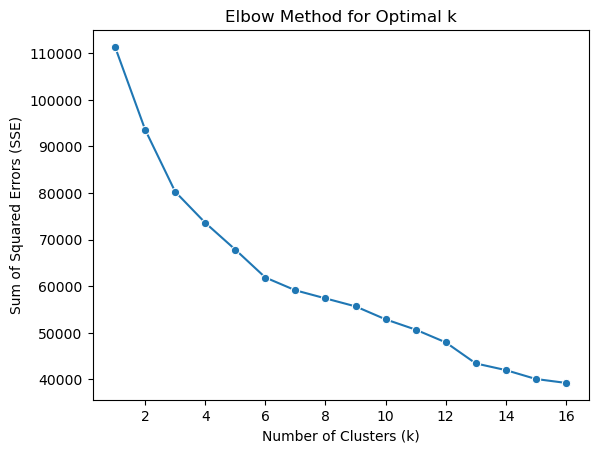

In [28]:
from sklearn.cluster import KMeans

df_elbow = pd.DataFrame(columns=["k", "sse"])

# Elbow Method: Cluster (k=1 ~ the number of columns)
for k in range(1, len(X_df.columns)):
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(X)
    sse = km.inertia_  # SSE
    df_elbow = pd.concat([df_elbow, pd.DataFrame({"k": [k], "sse": [sse]})], ignore_index=True) # Create DataFrame
    print(f"k={k}, SSE={sse:.0f}")

# Display the graph
sns.lineplot(x="k", y="sse", data=df_elbow, marker="o")
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.show()

# k=6 is the best cluster from the graph

C:\Users\Owner\AppData\Local\Temp\ipykernel_7720\4015024708.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_km = pd.concat([df_km, pd.DataFrame({"k": [k], "score": [score]})], ignore_index=True)


k=2, Silhouette Score=0.167
k=3, Silhouette Score=0.196
k=4, Silhouette Score=0.179
k=5, Silhouette Score=0.158
k=6, Silhouette Score=0.184
k=7, Silhouette Score=0.191
k=8, Silhouette Score=0.172
k=9, Silhouette Score=0.157
k=10, Silhouette Score=0.170
k=11, Silhouette Score=0.181
k=12, Silhouette Score=0.189
k=13, Silhouette Score=0.188
k=14, Silhouette Score=0.190
k=15, Silhouette Score=0.198
k=16, Silhouette Score=0.195


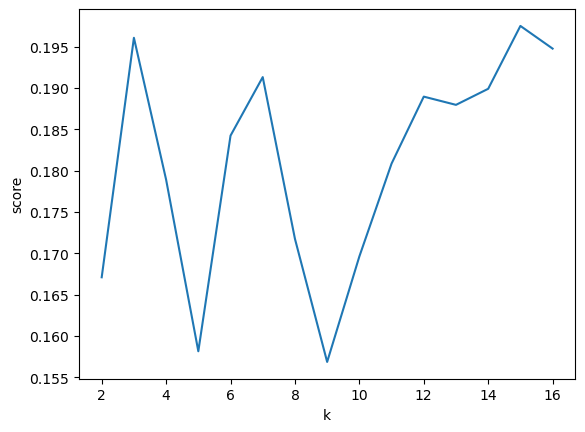

In [68]:
# Find the best clusters
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

df_km = pd.DataFrame(columns=["k", "score"])

for k in range(2, len(X_df.columns)):
    km = KMeans(n_clusters=k, random_state=1)
    preds = km.fit_predict(X)
    score = silhouette_score(X, preds)
    df_km = pd.concat([df_km, pd.DataFrame({"k": [k], "score": [score]})], ignore_index=True)
    print(f"k={k}, Silhouette Score={score:.3f}")

sns.lineplot(x="k", y="score", data=df_km)
plt.show()

In [30]:
# Apply KMeans (k=6)
k=6
kmeans = KMeans(n_clusters=k, random_state=1)
clusters_k = kmeans.fit_predict(X)

X_k = X_df.copy()
X_k["cluster"] = clusters_k

In [31]:
X_k.groupby("cluster").mean()

,city,line,station,walking time,room,L,D,K,S,balcony [m2],date_month,age,population,price/m2,count,popularity,residual
cluster,,,,,,,,,,,,,,,,,
0,-0.121215,0.142699,-0.489525,-0.043909,0.105879,0.015637,0.252386,0.194603,-0.018200,-0.079600,0.104022,0.485258,1.234567,-0.559785,-0.121746,-0.963880,-0.559785
1,1.083235,0.062158,0.119186,-0.483068,0.425344,0.354120,0.244810,0.194603,-0.071974,0.127385,-0.140730,-0.832240,0.190190,2.102247,1.083514,1.005139,2.102247
2,-0.400128,1.024716,1.963656,0.779197,0.497771,0.350165,0.255370,0.194603,0.089559,0.353570,-0.079216,-0.723255,-0.791581,0.077614,-0.400427,0.273526,0.077614
3,-0.939638,-0.553473,-0.456361,-0.316482,-0.171981,0.168729,0.249075,0.194603,0.052178,-0.097957,-0.066763,0.086795,-0.780579,-0.288320,-0.939490,-0.515834,-0.288320
4,-0.165062,-0.243353,-0.385849,-0.280058,-1.047628,-2.762205,-3.915886,-3.040551,-0.291366,-0.330116,-0.008039,0.620032,0.013931,-0.632308,-0.165079,-0.197725,-0.632307
5,1.313311,0.116019,0.082505,0.476430,-0.103038,0.146746,0.251865,0.194603,0.019008,0.047168,0.138005,0.112277,0.248300,-0.098488,1.313707,1.210707,-0.098488


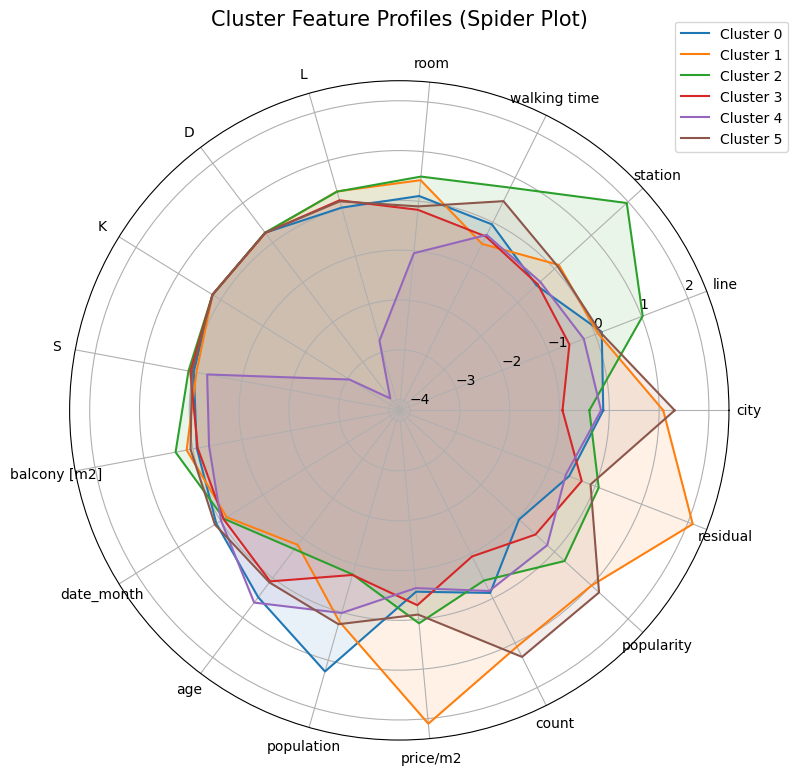

In [67]:
# DataFrame for Spider Plot
centroids = X_k.groupby("cluster").mean()

# List of feature names
labels = centroids.columns.tolist()
# Number of features
num_vars = len(labels)

# Angles for each axis in the plot
angles = np.linspace(0, 2*np.pi, num_vars, endpoint=False).tolist() # Divide the circle into equal-angle sections
angles += angles[:1] # Appends the first angle again at the end to close the loop

fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(polar=True)) # The last augument tells matplotlib to make it a radar chart instead of a regular plot

for idx in centroids.index:
  values = centroids.loc[idx].tolist()
  values += values[:1] # Adds the first value to the end so the shape is closed
  ax.plot(angles, values, label=f"Cluster {idx}")
  ax.fill(angles, values, alpha=0.1)

ax.set_xticks(angles[:-1]) # All angles except the repeated last one
ax.set_xticklabels(labels, fontsize=10) # Put the feature names

ax.set_title("Cluster Feature Profiles (Spider Plot)", size=15, pad=40)
ax.legend(loc="upper right", bbox_to_anchor=(1.1, 1.1))

plt.tight_layout()
plt.show()

# 3. Frequent Pattern

In [33]:
# !pip install mlxtend

In [34]:
df_ori.columns

Index(['apt_name', 'total Price', 'prefecture', 'city', 'town', 'line',
       'station', 'way', 'walking time', 'area [m2]', 'room', 'L', 'D', 'K',
       'S', 'balcony [m2]', 'date_month', 'age', 'population', 'price/m2',
       'count', 'popularity', 'residual'],
      dtype='object')

In [35]:
from mlxtend.frequent_patterns import apriori, association_rules

# df_freq = df[['total Price', 'city', 'town', 'line', 'station', 'walking time', 'area [m2]', 'room', 'L', 'D', 'K', 'S', 'age']].copy()
df_freq = df_ori[['city', 'line', 'station', 'walking time', 'area [m2]', 'room', 'age', 'residual']].copy()

# df_freq["total Price"] = pd.qcut(df_freq["total Price"], q=5, labels=["very cheap", "cheap", "normal", "expensive", "very expensive"])
df_freq["walking time"] = pd.qcut(df_freq["walking time"], q=5, labels=["very close", "close", "medium", "far", "very far"])
df_freq["area [m2]"] = pd.qcut(df_freq["area [m2]"], q=3, labels=["small", "medium", "large"])
df_freq["age"] = pd.qcut(df_freq["age"], q=3, labels=["new", "medium", "old"])
df_freq["residual"] = pd.qcut(df_freq["residual"], q=5, labels=["super undervalued", "undervalued", "medium", "overvalued", "super overvalued"])

df_freq.head()


,city,line,station,walking time,area [m2],room,age,residual
0,新宿,東京メトロ丸ノ内線,四谷三丁目,medium,medium,2,medium,overvalued
1,中央,東京メトロ半蔵門線,水天宮前,close,large,3,medium,overvalued
2,新宿,東京メトロ丸ノ内線,新宿御苑前,far,large,3,new,super overvalued
3,千代田,ＪＲ中央線,飯田橋,very close,medium,2,new,super overvalued
4,中央,東京メトロ日比谷線,八丁堀,very close,small,1,old,super undervalued


In [36]:
df_freq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6550 entries, 0 to 6549
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   city          6550 non-null   object  
 1   line          6550 non-null   object  
 2   station       6550 non-null   object  
 3   walking time  6550 non-null   category
 4   area [m2]     6550 non-null   category
 5   room          6550 non-null   int64   
 6   age           6550 non-null   category
 7   residual      6550 non-null   category
dtypes: category(4), int64(1), object(3)
memory usage: 231.1+ KB


In [37]:
# df_freq[["room", "L", "D", "K", "S"]] = df_freq[["room", "L", "D", "K", "S"]].astype(str)
df_freq[["room"]] = df_freq[["room"]].astype(str)

In [38]:
df_freq['city'] = df_freq['city'].astype(str)
df_freq['line'] = df_freq['line'].astype(str)
df_freq['station'] = df_freq['station'].astype(str)

df_one_hot = pd.get_dummies(df_freq)
df_one_hot.head()

,city_中央,city_千代田,city_文京,city_新宿,city_渋谷,city_港,line_りんかい線,line_京急本線,line_京王井の頭線,line_京王新線,...,room_4,room_5,age_new,age_medium,age_old,residual_super undervalued,residual_undervalued,residual_medium,residual_overvalued,residual_super overvalued
0,False,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,False,False,False,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
3,False,True,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False


In [39]:
df_one_hot

,city_中央,city_千代田,city_文京,city_新宿,city_渋谷,city_港,line_りんかい線,line_京急本線,line_京王井の頭線,line_京王新線,...,room_4,room_5,age_new,age_medium,age_old,residual_super undervalued,residual_undervalued,residual_medium,residual_overvalued,residual_super overvalued
0,False,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,False,False,False,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
3,False,True,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6545,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,True,False,False,True,False,False
6546,False,False,False,False,True,False,False,False,False,False,...,True,False,False,True,False,False,False,False,True,False
6547,False,False,False,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
6548,False,False,False,False,True,False,False,False,False,False,...,True,False,False,True,False,False,False,False,True,False


In [40]:
frequent_itemsets = apriori(df_one_hot, min_support=0.05, use_colnames=True)
print(frequent_itemsets.sort_values(by="support", ascending=False).head(10))

     support                   itemsets
21  0.440153                   (room_2)
23  0.348244                  (age_new)
20  0.347634                   (room_1)
18  0.333740         (area [m2]_medium)
17  0.333282          (area [m2]_small)
19  0.332977          (area [m2]_large)
25  0.330840                  (age_old)
24  0.320916               (age_medium)
4   0.298321                   (city_港)
12  0.263511  (walking time_very close)


In [41]:
# Requirements to be popular
investiment_elements = ["age_new", # new house
                        "walking time_very close", "walking time_close", # close to station
                        "area [m2]_large", "area [m2]_medium", # popular size
                        "room_2", "room_3", # popular the number of rooms
                        "station_虎ノ門ヒルズ", "station_六本木一丁目", "溜池山王", "新御茶ノ水", # top 4 popular stations
                        "line_東急東横線", "line_東京メトロ南北線", # top 2 popular lines
                        "city_港", "city_渋谷"] # top 2 popular cities

# cheap_price_labels = ["total Price_very cheap", "total Price_cheap"]
cheap_price_labels = ["residual_super undervalued"]

In [42]:
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)
# rules[rules['lift'] > 1.5]
# rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head()

In [43]:
investment_rules_noFileter = rules[
    rules['consequents'].apply(lambda x: any(c in x for c in cheap_price_labels))
]

investment_rules_noFileter[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by='lift', ascending=False)

,antecedents,consequents,support,confidence,lift
153,"(age_old, room_1)","(residual_super undervalued, area [m2]_small)",0.082901,0.570978,4.776380
36,"(city_新宿, age_old)",(residual_super undervalued),0.079542,0.797856,3.980165
150,"(age_old, room_1, area [m2]_small)",(residual_super undervalued),0.082901,0.648746,3.236316
94,"(age_old, area [m2]_small)",(residual_super undervalued),0.112672,0.648506,3.235122
106,"(area [m2]_medium, age_old)",(residual_super undervalued),0.055115,0.610829,3.047167
118,"(age_old, room_1)",(residual_super undervalued),0.088550,0.609884,3.042454
79,"(age_old, walking time_close)",(residual_super undervalued),0.061679,0.603886,3.012533
122,"(room_2, age_old)",(residual_super undervalued),0.078168,0.599532,2.990809
21,(age_old),(residual_super undervalued),0.186260,0.562990,2.808520


In [44]:
investment_rules_fileter = rules[
    rules['consequents'].apply(lambda x: any(c in x for c in cheap_price_labels)) &
    rules['antecedents'].apply(lambda x: any(k in x for k in investiment_elements))
]

investment_rules_fileter[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by='lift', ascending=False)

,antecedents,consequents,support,confidence,lift
106,"(area [m2]_medium, age_old)",(residual_super undervalued),0.055115,0.610829,3.047167
79,"(age_old, walking time_close)",(residual_super undervalued),0.061679,0.603886,3.012533
122,"(room_2, age_old)",(residual_super undervalued),0.078168,0.599532,2.990809


# 4. Boosting

- KFold (5)
- AutoTuning

In [45]:
# !pip install optuna

## 4.1. LightGBM

In [46]:
# Bayesian optimization
import optuna
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score

def obj(trial):
  params = {
    "n_estimators" : trial.suggest_int("n_estimators", 100, 1000),
    "max_depth" : trial.suggest_int("max_depth", 3, 10),
    "learning_rate" : trial.suggest_float("learning_rate", 0.01, 0.3),
    "subsample" : trial.suggest_float("subsample", 0.6, 1.0),
    "colsample_bytree" : trial.suggest_float("colsample_bytree", 0.6, 1.0)
  }

  model = LGBMRegressor(**params)
  score = cross_val_score(model, X_deal_scaled, y_deal_log, cv=5, scoring="r2", n_jobs=-1)
  return score.mean()

study = optuna.create_study(direction="maximize")
study.optimize(obj, n_trials=30)

print("Best trial: ")
print(study.best_trial)

best_params = study.best_trial.params
best_model = LGBMRegressor(**best_params)
best_model.fit(X_deal_scaled, y_deal_log)


print("Best R2 score:", study.best_trial.value)
print("Best params:", best_params)

[I 2025-05-15 11:26:02,132] A new study created in memory with name: no-name-96837e93-3c6a-4593-86ab-a05ff9ef9011
c:\Users\Owner\anaconda3\Lib\site-packages\sklearn\utils\_tags.py:354: DeprecationWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
[I 2025-05-15 11:26:19,747] Trial 0 finished with value: 0.6006935260034536 and parameters: {'n_estimators': 414, 'max_depth': 5, 'learning_rate': 0.19174780761533067, 'subsample': 0.7992826991561672, 'colsample_bytree': 0.7137927154774802}. Best is trial 0 with value: 0.6006935260034536.
c:\Users\Owner\anaconda3\Lib\site-packages\sklearn\utils\_tags.py:3

Best trial: 
FrozenTrial(number=27, state=1, values=[0.6308653822536302], datetime_start=datetime.datetime(2025, 5, 15, 11, 28, 50, 551885), datetime_complete=datetime.datetime(2025, 5, 15, 11, 28, 59, 263045), params={'n_estimators': 939, 'max_depth': 8, 'learning_rate': 0.11727931179597573, 'subsample': 0.9982271338478728, 'colsample_bytree': 0.8186899983652548}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=1000, log=False, low=100, step=1), 'max_depth': IntDistribution(high=10, log=False, low=3, step=1), 'learning_rate': FloatDistribution(high=0.3, log=False, low=0.01, step=None), 'subsample': FloatDistribution(high=1.0, log=False, low=0.6, step=None), 'colsample_bytree': FloatDistribution(high=1.0, log=False, low=0.6, step=None)}, trial_id=27, value=None)
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001485 seconds.
You can set `force_row_wise=true` to remove the overhead.
And i

In [47]:
# LightGBM with Default Parameters
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error

lgbm = LGBMRegressor()

cv = KFold(n_splits=5, shuffle=True, random_state=1)

r_squared_results = []
rmse_results = []

for train_index, test_index in cv.split(X_reg_scaled):
  X_reg_train, X_reg_test, y_reg_train, y_reg_test = X_reg_scaled[train_index], X_reg_scaled[test_index], y_reg_log[train_index], y_reg_log[test_index]
  lgbm.fit(X_reg_train, y_reg_train)
  y_reg_pred = lgbm.predict(X_reg_test)

  r2 = r2_score(y_reg_test, y_reg_pred)
  r_squared_results.append(r2)
  rmse = mean_squared_error(y_reg_test, y_reg_pred)
  rmse_results.append(rmse)

print("Average R-squared: ", np.mean(r_squared_results))
print("Average RMSE: ", np.mean(rmse_results))

c:\Users\Owner\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Owner\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Owner\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Owner\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Owner\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d a

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001295 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 760
[LightGBM] [Info] Number of data points in the train set: 5035, number of used features: 51
[LightGBM] [Info] Start training from score 0.010998
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003951 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 759
[LightGBM] [Info] Number of data points in the train set: 5035, number of used features: 51
[LightGBM] [Info] Start training from score -0.003098


c:\Users\Owner\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Owner\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Owner\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Owner\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Owner\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_fi

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003488 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 760
[LightGBM] [Info] Number of data points in the train set: 5035, number of used features: 51
[LightGBM] [Info] Start training from score -0.004410
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001970 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 759
[LightGBM] [Info] Number of data points in the train set: 5035, number of used features: 51
[LightGBM] [Info] Start training from score 0.007284
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001138 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, 

c:\Users\Owner\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Owner\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Owner\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Owner\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [48]:
print(lgbm.get_params())

{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': None, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0}


## 4.2. preprocessing for LightGBM

In [49]:
df_ori.columns

Index(['apt_name', 'total Price', 'prefecture', 'city', 'town', 'line',
       'station', 'way', 'walking time', 'area [m2]', 'room', 'L', 'D', 'K',
       'S', 'balcony [m2]', 'date_month', 'age', 'population', 'price/m2',
       'count', 'popularity', 'residual'],
      dtype='object')

In [50]:
df_ori.head(3)

,apt_name,total Price,prefecture,city,town,line,station,way,walking time,area [m2],...,K,S,balcony [m2],date_month,age,population,price/m2,count,popularity,residual
0,ライオンズガーデン四谷津の守坂,158000000,東京,新宿,四谷三栄町,東京メトロ丸ノ内線,四谷三丁目,徒歩,6,62.48,...,1,0,6.62,2,21,352717.0,2.528809e+06,1294,0.366866,2.528809e+06
1,トルナーレ日本橋浜町,248000000,東京,中央,日本橋浜町３,東京メトロ半蔵門線,水天宮前,徒歩,5,78.62,...,1,0,25.53,8,20,187404.0,3.154414e+06,1127,0.601375,3.154413e+06
2,富久クロス コンフォートタワー,368000000,東京,新宿,富久町,東京メトロ丸ノ内線,新宿御苑前,徒歩,7,75.38,...,1,0,12.21,4,10,352717.0,4.881932e+06,1294,0.366866,4.881931e+06


In [51]:
df_bst = df_ori.drop(["apt_name", "prefecture", "way", "total Price", "residual"], axis=1).copy()
df_bst.head(3)

,city,town,line,station,walking time,area [m2],room,L,D,K,S,balcony [m2],date_month,age,population,price/m2,count,popularity
0,新宿,四谷三栄町,東京メトロ丸ノ内線,四谷三丁目,6,62.48,2,1,1,1,0,6.62,2,21,352717.0,2.528809e+06,1294,0.366866
1,中央,日本橋浜町３,東京メトロ半蔵門線,水天宮前,5,78.62,3,1,1,1,0,25.53,8,20,187404.0,3.154414e+06,1127,0.601375
2,新宿,富久町,東京メトロ丸ノ内線,新宿御苑前,7,75.38,3,1,1,1,0,12.21,4,10,352717.0,4.881932e+06,1294,0.366866


In [52]:
df_bst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6550 entries, 0 to 6549
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          6550 non-null   object 
 1   town          6550 non-null   object 
 2   line          6550 non-null   object 
 3   station       6550 non-null   object 
 4   walking time  6550 non-null   int64  
 5   area [m2]     6550 non-null   float64
 6   room          6550 non-null   int64  
 7   L             6550 non-null   int64  
 8   D             6550 non-null   int64  
 9   K             6550 non-null   int64  
 10  S             6550 non-null   int64  
 11  balcony [m2]  6550 non-null   float64
 12  date_month    6550 non-null   int64  
 13  age           6550 non-null   int64  
 14  population    6550 non-null   float64
 15  price/m2      6550 non-null   float64
 16  count         6550 non-null   int64  
 17  popularity    6550 non-null   float64
dtypes: float64(5), int64(9), obj

In [53]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cat_cols = ["city", "town", "line", "station", ]
for col in cat_cols:
  df_bst[col] = le.fit_transform(df_bst[col])


In [54]:
X_bst = df_bst.drop("price/m2", axis=1)
y_bst = df_bst["price/m2"].values.reshape(-1, 1)

In [55]:
# Apply Log Transformation for Responsive Variable
y_bst = log.fit_transform(y_bst)

In [56]:
# Replace characters that LightGBM can not handle with underscore(_)
import re
X_bst.columns = [re.sub(r'\W+', '_', col) for col in X_bst.columns]

In [57]:
# Bayesian optimization
import optuna
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score

def obj(trial):
  params = {
    "n_estimators" : trial.suggest_int("n_estimators", 100, 1000),
    "max_depth" : trial.suggest_int("max_depth", 3, 10),
    "learning_rate" : trial.suggest_float("learning_rate", 0.01, 0.3),
    "subsample" : trial.suggest_float("subsample", 0.6, 1.0),
    "colsample_bytree" : trial.suggest_float("colsample_bytree", 0.6, 1.0)
  }

  model = LGBMRegressor(**params)
  score = cross_val_score(model, X_bst, y_bst, cv=5, scoring="r2", n_jobs=-1)
  return score.mean()

study = optuna.create_study(direction="maximize")
study.optimize(obj, n_trials=30)

print("Best trial: ")
print(study.best_trial)

best_params2 = study.best_trial.params
best_model2 = LGBMRegressor(**best_params2)
best_model2.fit(X_bst, y_bst)


print("Best R2 score:", study.best_trial.value)
print("Best params:", best_params2)

[I 2025-05-15 11:29:16,389] A new study created in memory with name: no-name-e5c2fd53-54cf-40b1-8d8f-683ce83e3e5f
c:\Users\Owner\anaconda3\Lib\site-packages\sklearn\utils\_tags.py:354: DeprecationWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
[I 2025-05-15 11:29:19,268] Trial 0 finished with value: 0.7005093456860155 and parameters: {'n_estimators': 354, 'max_depth': 8, 'learning_rate': 0.19421755703194796, 'subsample': 0.7466106565924489, 'colsample_bytree': 0.63087775580316}. Best is trial 0 with value: 0.7005093456860155.
c:\Users\Owner\anaconda3\Lib\site-packages\sklearn\utils\_tags.py:354

Best trial: 
FrozenTrial(number=22, state=1, values=[0.725109115553816], datetime_start=datetime.datetime(2025, 5, 15, 11, 31, 31, 437757), datetime_complete=datetime.datetime(2025, 5, 15, 11, 31, 45, 221458), params={'n_estimators': 905, 'max_depth': 9, 'learning_rate': 0.07610605888577913, 'subsample': 0.7865320458531253, 'colsample_bytree': 0.6602568576614541}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=1000, log=False, low=100, step=1), 'max_depth': IntDistribution(high=10, log=False, low=3, step=1), 'learning_rate': FloatDistribution(high=0.3, log=False, low=0.01, step=None), 'subsample': FloatDistribution(high=1.0, log=False, low=0.6, step=None), 'colsample_bytree': FloatDistribution(high=1.0, log=False, low=0.6, step=None)}, trial_id=22, value=None)
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000609 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if

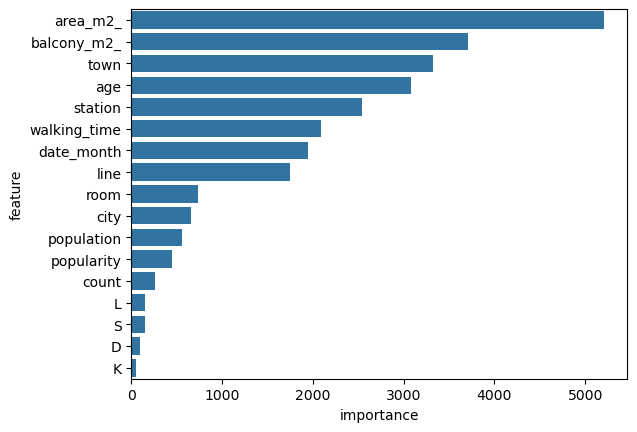

In [58]:
importances = best_model2.feature_importances_
importances_df = pd.DataFrame({
  "feature": X_bst.columns,
  "importance": importances
}).sort_values(by="importance", ascending=False)

sns.barplot(x="importance", y="feature", data=importances_df)
plt.show()